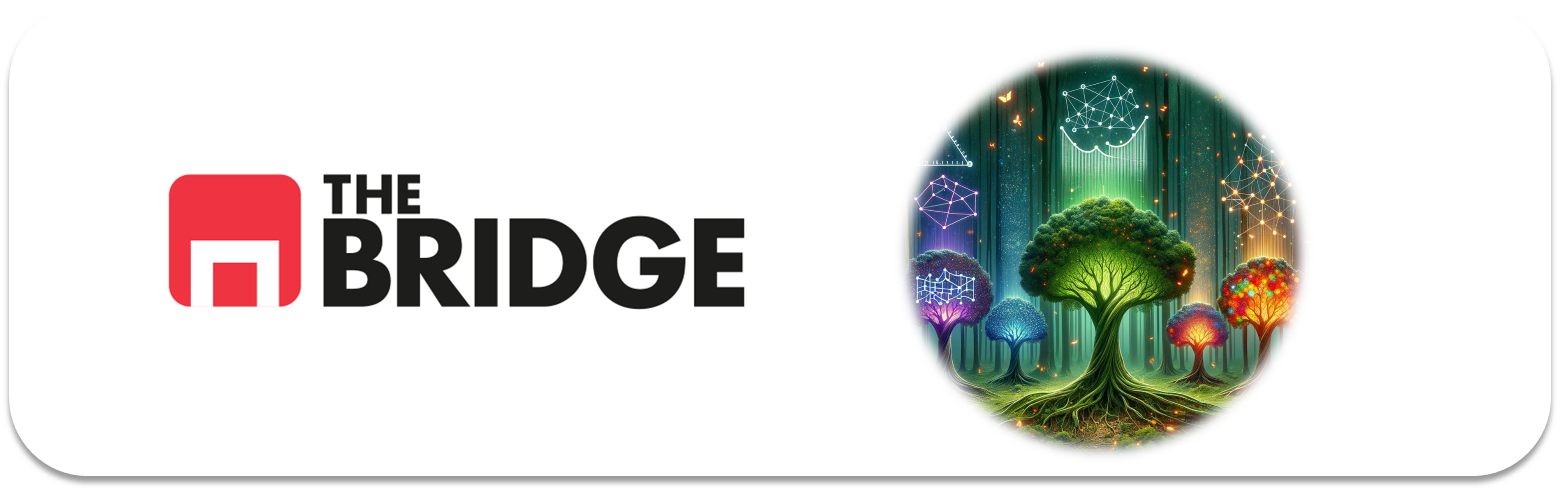

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

Cargar dataset 

In [2]:
df_bank = pd.read_csv('./data/bank-full.csv', sep = ';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Target 

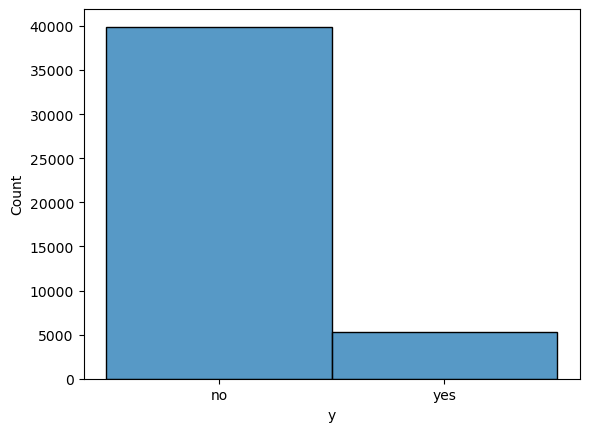

In [6]:
target = 'y'
sns.histplot(df_bank[target], bins = 20)
plt.show()

In [7]:
categorical_var = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_var = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Split train / test

In [9]:
X = df_bank.drop(target, axis = 1)
y = df_bank[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
print(X_train.shape) 
print(X_test.shape )
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


MiniEDA

In [11]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

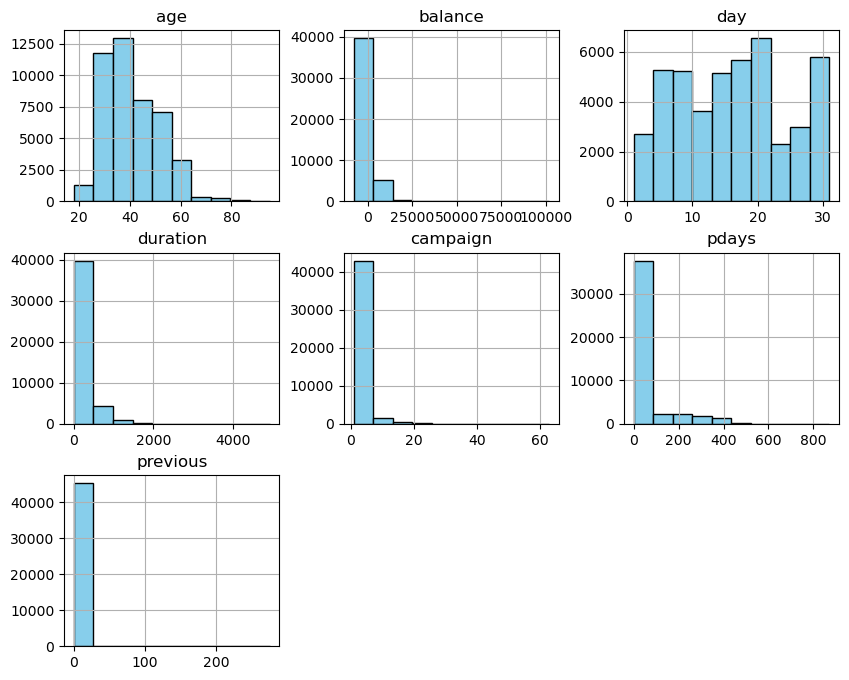

In [13]:
numerical_var = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_bank[numerical_var].hist(bins = 10, figsize = (10, 8), color = 'skyblue', edgecolor = 'black')

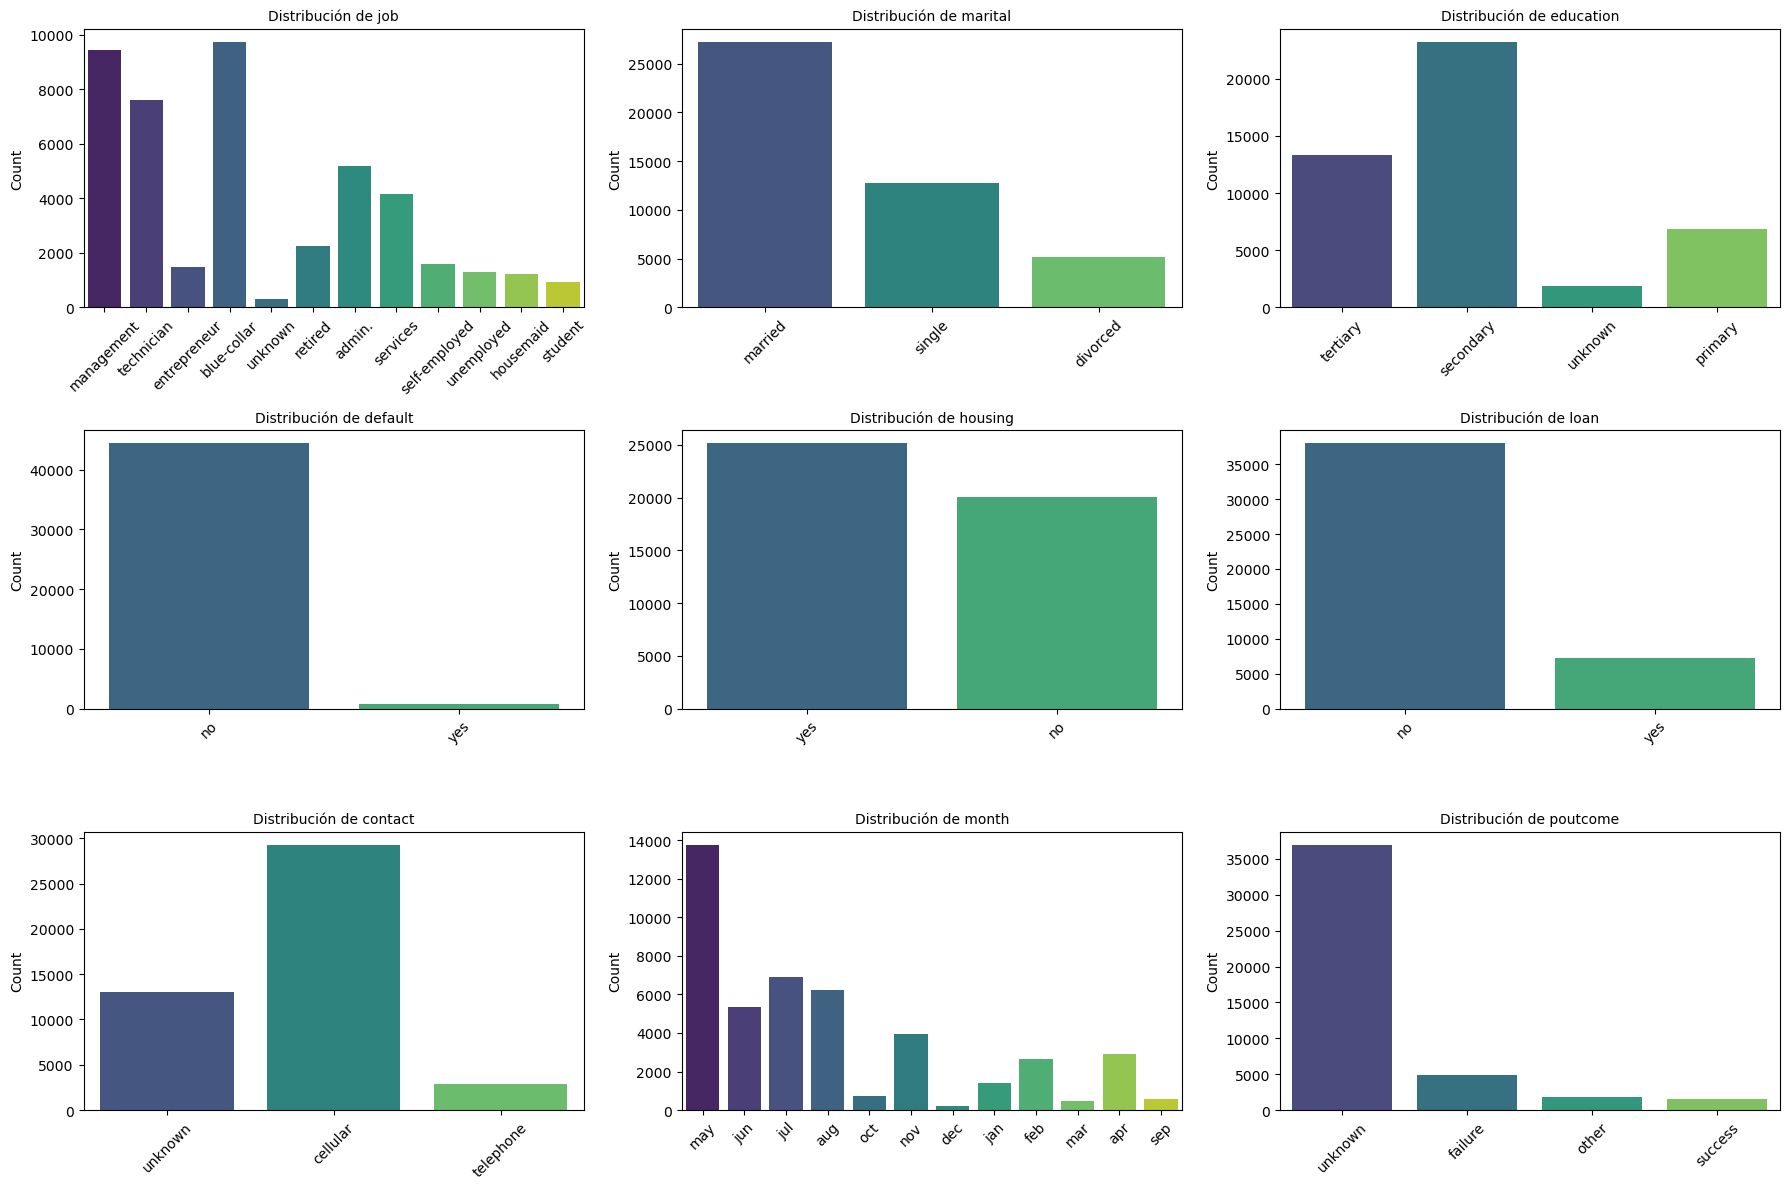

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (18, 12))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
axes = axes.flatten()

for i, var in enumerate(categorical_var):
    sns.countplot(data = df_bank, x=var, ax=axes[i], palette = 'viridis')
    axes[i].set_title(f'Distribución de {var}', fontsize = 10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

Tratamiento variables

In [ ]:
for col in ['housing', 'default', 'loan']:
    df_bank[f'remainder__{col}'] = df_bank[col].map({'yes': 1, 'no': 0})

In [ ]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,remainder__housing,remainder__default,remainder__loan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 45211 non-null  int64 
 1   job                 45211 non-null  object
 2   marital             45211 non-null  object
 3   education           45211 non-null  object
 4   default             45211 non-null  object
 5   balance             45211 non-null  int64 
 6   housing             45211 non-null  object
 7   loan                45211 non-null  object
 8   contact             45211 non-null  object
 9   day                 45211 non-null  int64 
 10  month               45211 non-null  object
 11  duration            45211 non-null  int64 
 12  campaign            45211 non-null  int64 
 13  pdays               45211 non-null  int64 
 14  previous            45211 non-null  int64 
 15  poutcome            45211 non-null  object
 16  y                   45

In [ ]:
df_bank['log_balance'] = np.log(df_bank['balance'] + 1)
df_bank['log_duration'] = np.log(df_bank['duration'] + 1)

c:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


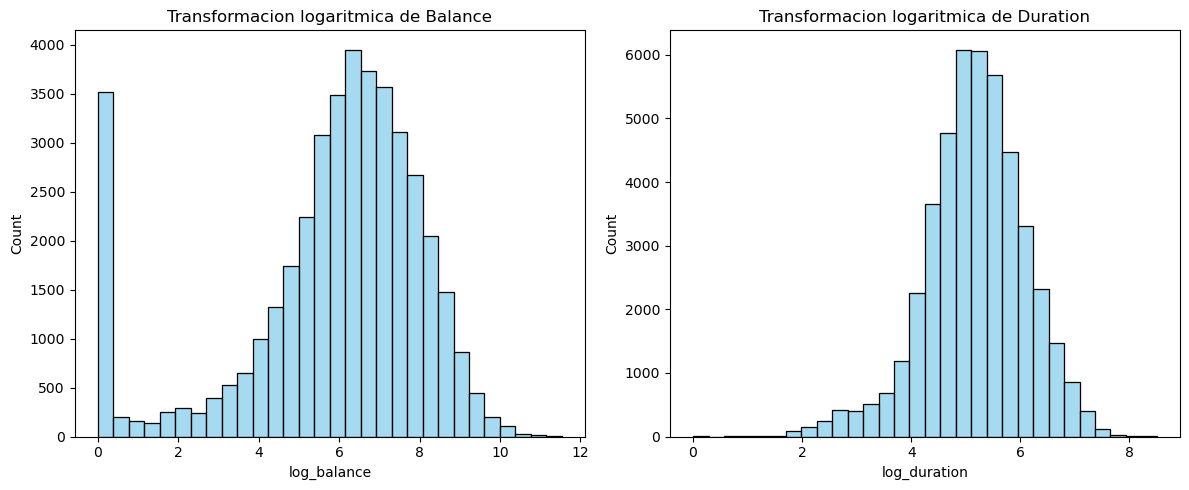

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df_bank['log_balance'], bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Transformacion logaritmica de Balance')

sns.histplot(df_bank['log_duration'], bins=30, ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Transformacion logaritmica de Duration')

plt.tight_layout()
plt.show()

In [ ]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,remainder__housing,remainder__default,remainder__loan,log_balance,log_duration
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,1,0,0,7.670429,5.568345
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,1,0,0,3.401197,5.023881
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,1,0,1,1.098612,4.343805
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,1,0,0,7.317876,4.532599
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0,0,0,0.693147,5.293305


In [ ]:
df_bank = df_bank.drop(columns = ['housing', 'default', 'loan', 'balance', 'duration'])

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 45211 non-null  int64  
 1   job                 45211 non-null  object 
 2   marital             45211 non-null  object 
 3   education           45211 non-null  object 
 4   contact             45211 non-null  object 
 5   day                 45211 non-null  int64  
 6   month               45211 non-null  object 
 7   campaign            45211 non-null  int64  
 8   pdays               45211 non-null  int64  
 9   previous            45211 non-null  int64  
 10  poutcome            45211 non-null  object 
 11  y                   45211 non-null  object 
 12  remainder__housing  45211 non-null  int64  
 13  remainder__default  45211 non-null  int64  
 14  remainder__loan     45211 non-null  int64  
 15  log_balance         41495 non-null  float64
 16  log_

In [ ]:
new_categorical = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
new_numerical = ['age', 'day', 'campaign', 'pdays', 'previous', 'remainder__housing', 'remainder__default', 'remainder__loan', 'log_balance', 'log_duration']

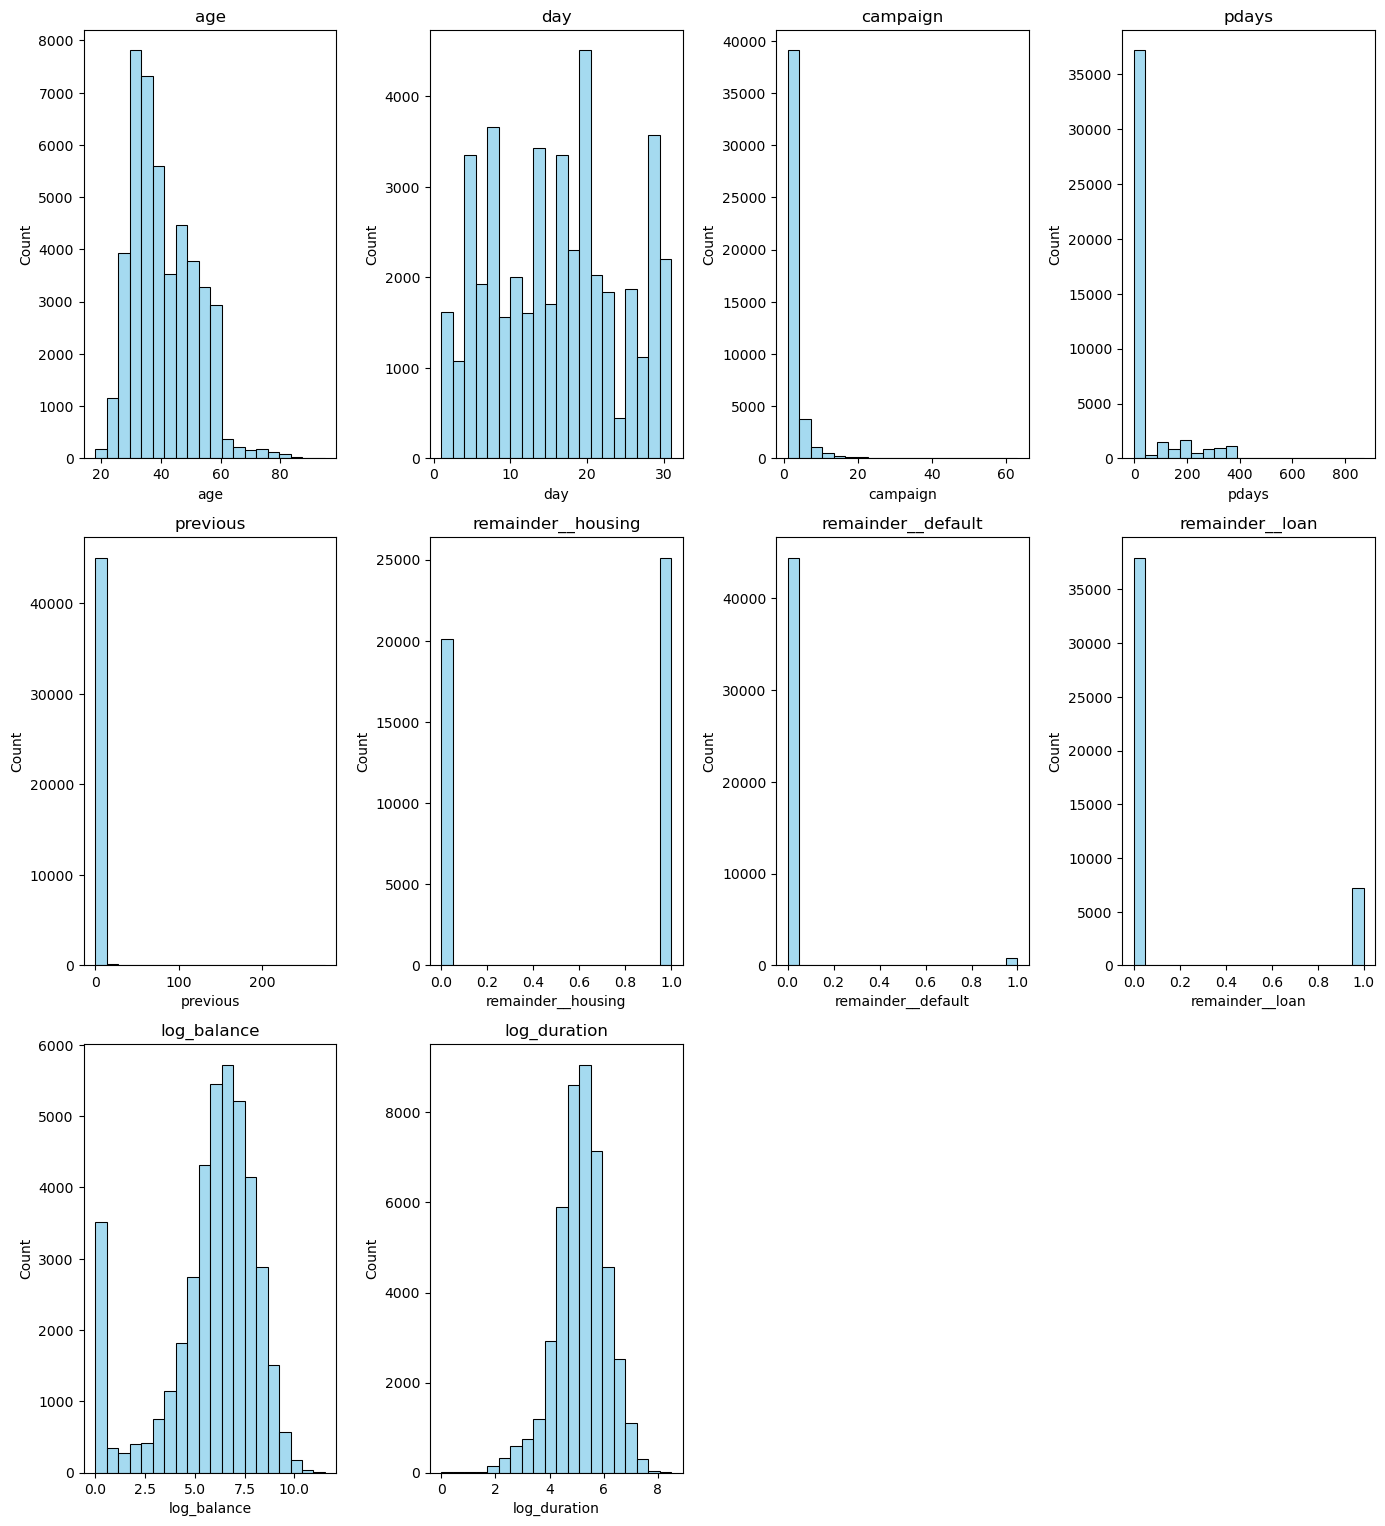

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 20))  
axes = axes.flatten() 

for i, var in enumerate(new_numerical):
    sns.histplot(df_bank[var], bins=20, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{var}')

for ax in axes[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

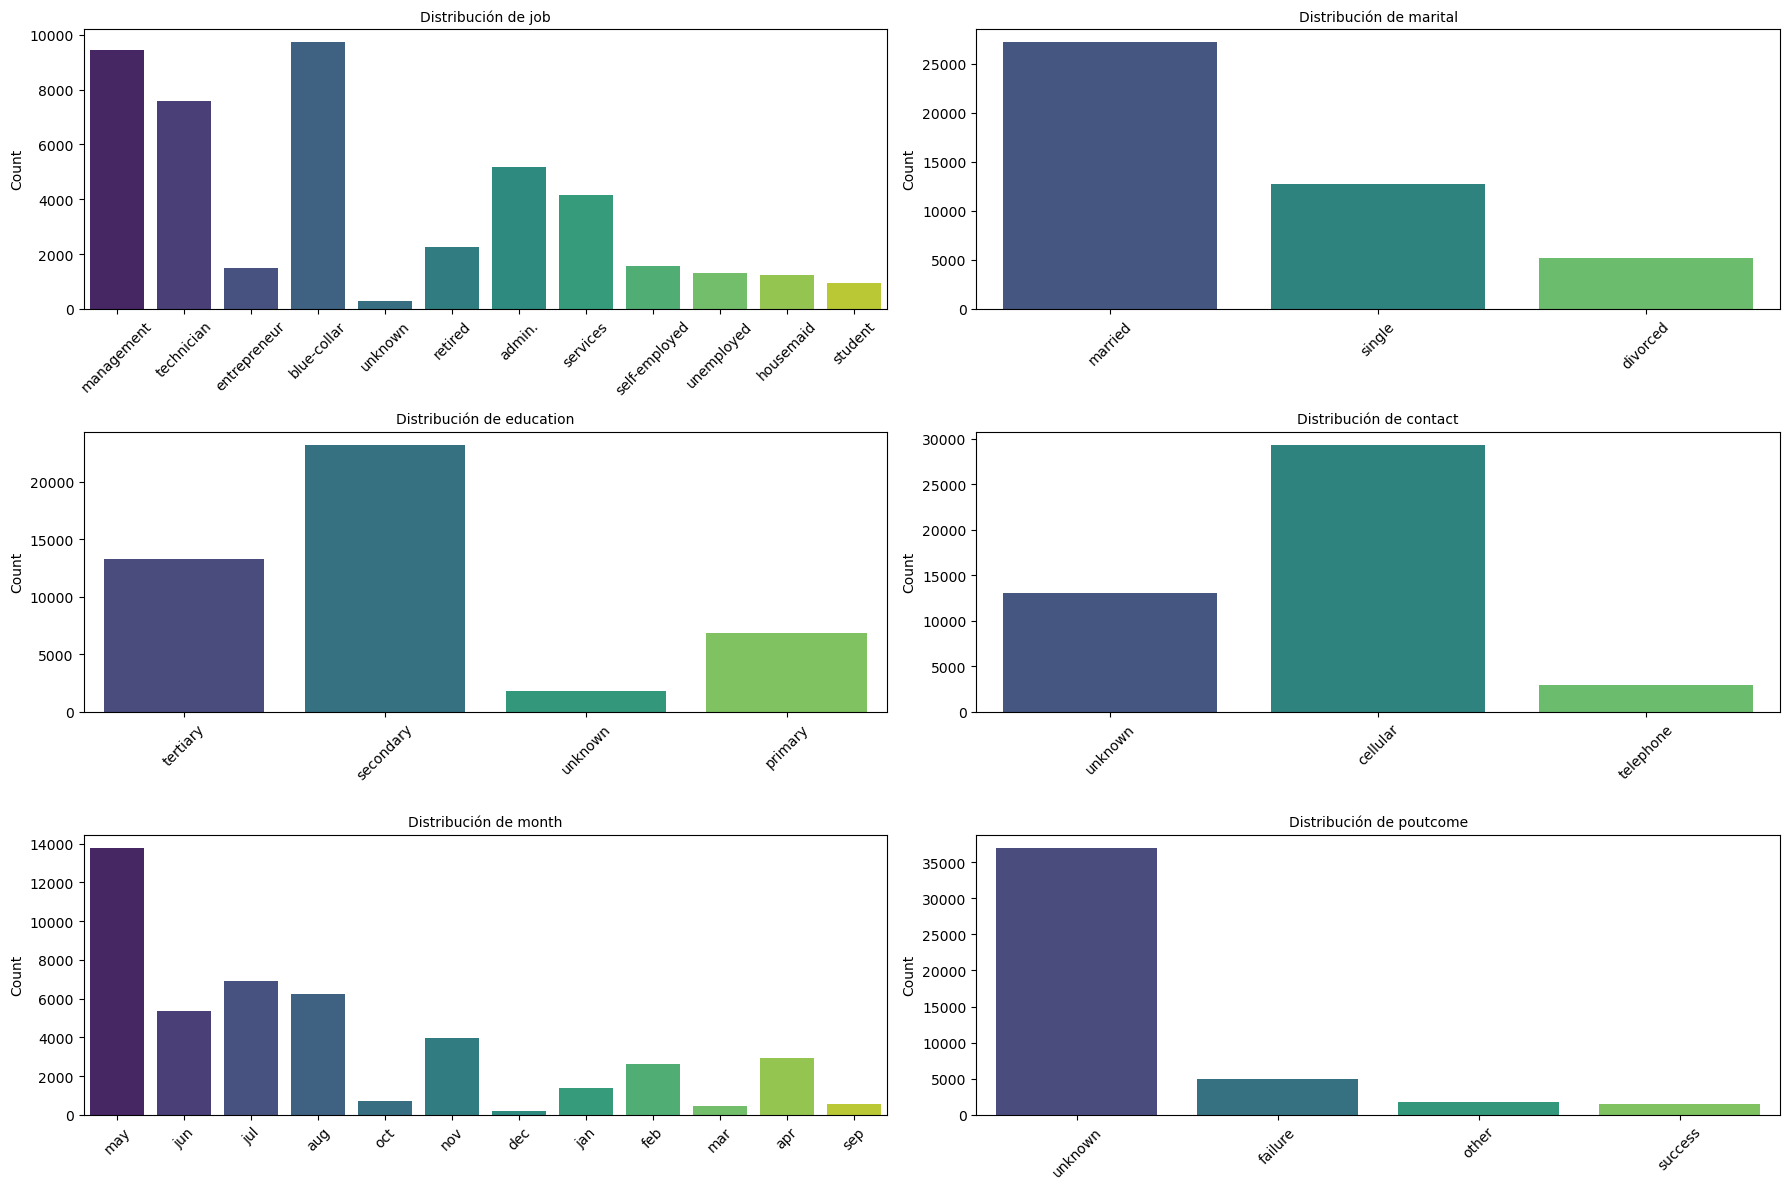

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 12))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
axes = axes.flatten()

for i, var in enumerate(new_categorical):
    sns.countplot(data = df_bank, x=var, ax=axes[i], palette = 'viridis')
    axes[i].set_title(f'Distribución de {var}', fontsize = 10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_bank['y'] = label_encoder.fit_transform(df_bank['y'])

In [15]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


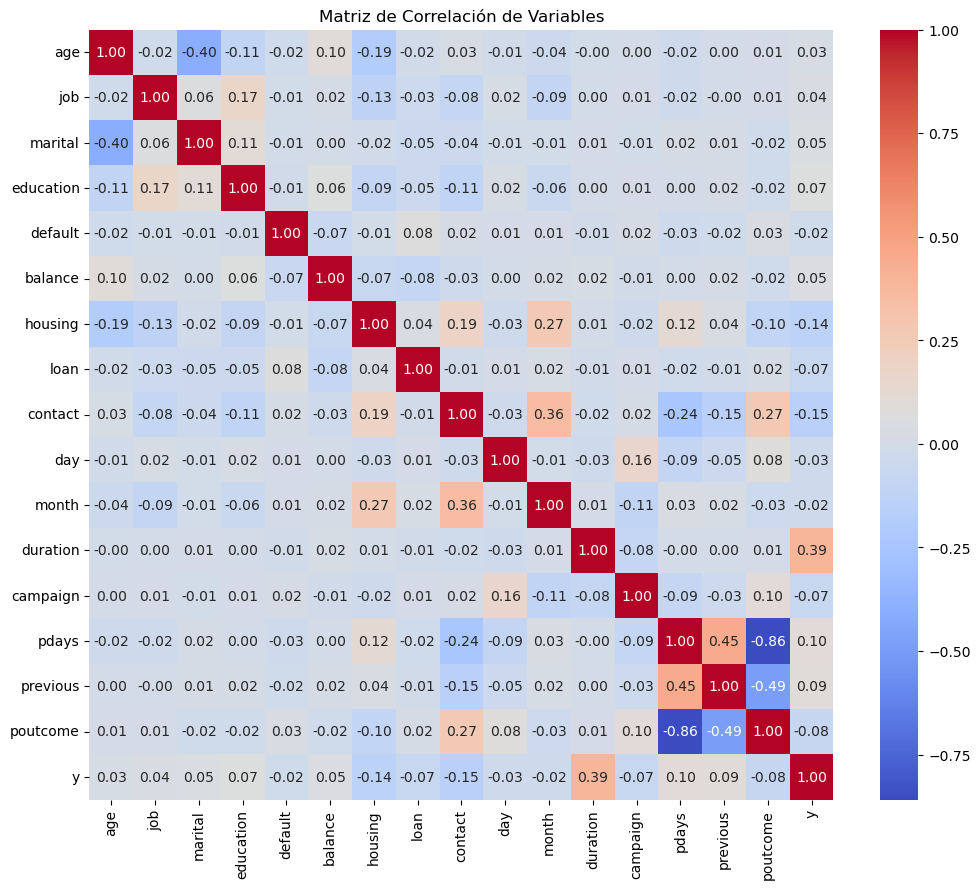

In [16]:
for column in df_bank.select_dtypes(include=['object']).columns:
    df_bank[column] = label_encoder.fit_transform(df_bank[column])

# Calcular la matriz de correlación
correlation_matrix = df_bank.corr()

# Visualizar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Variables")
plt.show()

Regresion logistica 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
selected_features = ['duration', 'poutcome', 'contact', 'pdays', 'month']

In [ ]:
X_filtered = df_bank[selected_features]
y_filtered = df_bank['y']

In [19]:
categorical_features = ['poutcome', 'contact', 'month']
one_hot_encoder = OneHotEncoder()

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ], remainder='passthrough')

In [23]:
logistic_regression_model = LogisticRegression(max_iter = 1000, random_state = 42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_regression_model)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['poutcome', 'contact',
                                                   'month'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [24]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.8973791883224593,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94      7952\n           1       0.65      0.32      0.43      1091\n\n    accuracy                           0.90      9043\n   macro avg       0.78      0.65      0.69      9043\nweighted avg       0.88      0.90      0.88      9043\n')

Optimizar los hiperparametros

In [25]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid_adjusted = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']  
}

grid_search_adjusted = GridSearchCV(pipeline, param_grid_adjusted, cv=5, scoring='accuracy', verbose=1)

grid_search_adjusted.fit(X_train, y_train)

best_params_adjusted = grid_search_adjusted.best_params_
best_score_adjusted = grid_search_adjusted.best_score_

best_params_adjusted, best_score_adjusted


Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'classifier__C': 1,
  'classifier__penalty': 'l1',
  'classifier__solver': 'liblinear'},
 0.9016811215422387)

Evaluar el modelo

In [34]:
optimized_model = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42)
pipeline_optimized = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', optimized_model)])

pipeline_optimized.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['poutcome', 'contact',
                                                   'month'])])),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [35]:
y_pred_optimized_manual = pipeline_optimized.predict(X_test)
accuracy_optimized_manual = accuracy_score(y_test, y_pred_optimized_manual)
report_optimized_manual = classification_report(y_test, y_pred_optimized_manual)

accuracy_optimized_manual, report_optimized_manual

(0.8971580227800509,
 '              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94      7952\n           1       0.65      0.32      0.43      1091\n\n    accuracy                           0.90      9043\n   macro avg       0.78      0.65      0.69      9043\nweighted avg       0.88      0.90      0.88      9043\n')